In [ ]:
#Heart attack analysis and prediction
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("heart_attack_analysis.csv")

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)


In [ ]:
# Instead of reshaping X_test to (-1, 1), keep the original number of features
# X_test = X_test.reshape(-1, 1) # Remove or comment out this line

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
# Instead of reshaping, ensure X_test has the same number of columns as X_train
# Assuming X has the original features before any reshaping
X_test = sc.transform(X_test)  # Transform X_test using the fitted scaler

In [ ]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(random_state = 1)
model1.fit(X_train,y_train)

LogisticRegression(random_state=1)

In [ ]:
y_pred1  = model1.predict(X_test)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.77      0.67      0.71        30
           1       0.71      0.81      0.76        31

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



In [ ]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state = 1)
model2.fit(X_train,y_train)
y_pred2  = model2.predict(X_test)
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        30
           1       0.76      0.90      0.82        31

    accuracy                           0.80        61
   macro avg       0.82      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred2)
print(cm)
accuracy_score(y_test, y_pred2)

[[21  9]
 [ 3 28]]


0.8032786885245902

In [ ]:
# Instead of using 'coef_', use 'feature_importances_' for RandomForestClassifier
model2_feature_importances_df = pd.DataFrame(model2.feature_importances_, index=df.columns[:-1], columns=['Feature Importance'])
model2_feature_importances_df

,Feature Importance
age,0.078135
sex,0.042061
cp,0.165800
trestbps,0.074767
chol,0.075866
fbs,0.008276
restecg,0.020139
thalach,0.127722
exang,0.069496
oldpeak,0.099566


ROC AUC Score: 0.8704301075268818


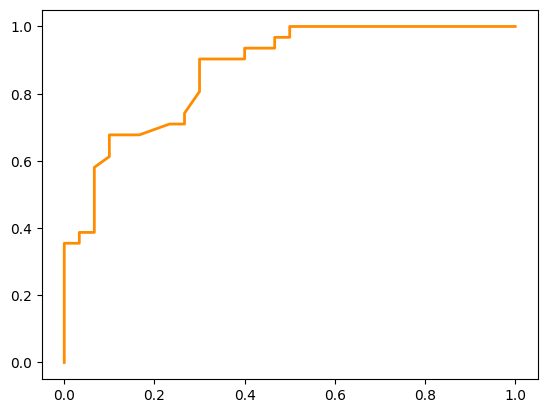

In [ ]:
#roi curve
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_prob = model2.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC Score:", roc_auc)
#plotting the curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
